In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,ConfusionMatrixDisplay,
    precision_recall_curve,
    auc,
    roc_curve,
    roc_auc_score
)
from itertools import product
from sklearn.metrics import average_precision_score, make_scorer,precision_score, recall_score, f1_score, precision_recall_curve, auc

from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate, GridSearchCV



In [ ]:
df=pd.read_csv('train_provider_features.csv')
df.dropna(inplace=True)
df.head()

,Provider,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,...,ChronicCond_ObstrPulmonary_<lambda>,ChronicCond_Depression_<lambda>,ChronicCond_Diabetes_<lambda>,ChronicCond_IschemicHeart_<lambda>,ChronicCond_Osteoporasis_<lambda>,ChronicCond_rheumatoidarthritis_<lambda>,ChronicCond_stroke_<lambda>,RenalDiseaseIndicator_<lambda>,PotentialFraud,PotentialFraud_Encoded
0,PRV51001,25,24,14,104640,4185.600000,10796.091144,5340.0,213.600000,12.000000,...,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.320000,No,0
1,PRV51003,132,117,44,605670,4588.409091,7309.794729,66286.0,502.166667,11.818182,...,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.219697,Yes,1
2,PRV51004,149,138,38,52170,350.134228,689.963754,310.0,2.080537,11.865772,...,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.154362,No,0
3,PRV51005,1165,495,6,280910,241.124464,491.556392,3700.0,3.175966,11.907296,...,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.222318,Yes,1
4,PRV51007,72,58,10,33710,468.194444,1433.769116,3264.0,45.333333,11.833333,...,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.152778,No,0


In [14]:
df.drop('PotentialFraud',axis=1,inplace=True)
df.drop('Provider',axis=1,inplace=True)
# Replace '<lambda>' with 'per' in feature names
df.columns = df.columns.str.replace('<lambda>', 'ratio')
df.head()

,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,...,ChronicCond_Cancer_ratio,ChronicCond_ObstrPulmonary_ratio,ChronicCond_Depression_ratio,ChronicCond_Diabetes_ratio,ChronicCond_IschemicHeart_ratio,ChronicCond_Osteoporasis_ratio,ChronicCond_rheumatoidarthritis_ratio,ChronicCond_stroke_ratio,RenalDiseaseIndicator_ratio,PotentialFraud_Encoded
0,25,24,14,104640,4185.600000,10796.091144,5340.0,213.600000,12.000000,12.000000,...,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.320000,0
1,132,117,44,605670,4588.409091,7309.794729,66286.0,502.166667,11.818182,11.871212,...,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.219697,1
2,149,138,38,52170,350.134228,689.963754,310.0,2.080537,11.865772,11.959732,...,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.154362,0
3,1165,495,6,280910,241.124464,491.556392,3700.0,3.175966,11.907296,11.939914,...,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.222318,1
4,72,58,10,33710,468.194444,1433.769116,3264.0,45.333333,11.833333,11.833333,...,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.152778,0


In [ ]:
# Hyperparameter tuning but this time by running cross validation for each parameter combination.

X = df.drop('PotentialFraud_Encoded', axis=1)
y = df['PotentialFraud_Encoded']

# Class weights for Logistic Regression
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = {classes[i]: weights[i] for i in range(len(classes))}

# Scale_pos_weight for XGBoost

neg = np.sum(y == 0)
pos = np.sum(y == 1)
scale_pos_weight = neg / pos

# Define scoring metrics
scoring = {
    'F1': make_scorer(f1_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'ROC_AUC': 'roc_auc',
    'PRAUC': 'average_precision'
}

# Cross-validation strategy(Stratified because it is imbalanced)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grids
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.2]
}

lr_param_grid = {
    'C': [0.01, 1, 10],
    'penalty': ['l2'],  # Using l2 as per your original model
    'solver': ['liblinear']  # suitable for small datasets and l2
}

# Initialize models
models = {
    'XGBoost': xgb.XGBClassifier(
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        class_weight=class_weight_dict,
        random_state=42
    )
}

param_grids = {
    'XGBoost': xgb_param_grid,
    'Logistic Regression': lr_param_grid
}

# Hyperparameter tuning with GridSearchCV
best_results = {}

for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring=scoring,
        cv=cv,
        refit='F1',  # choose F1 as primary metric for selecting best model
        return_train_score=False,
        verbose=1
    )
    grid.fit(X, y)

    # Store best parameters and metrics
    best_results[name] = {
        'Best Params': grid.best_params_,
        'F1': grid.cv_results_['mean_test_F1'][grid.best_index_],
        'Precision': grid.cv_results_['mean_test_Precision'][grid.best_index_],
        'Recall': grid.cv_results_['mean_test_Recall'][grid.best_index_],
        'ROC_AUC': grid.cv_results_['mean_test_ROC_AUC'][grid.best_index_],
        'PRAUC': grid.cv_results_['mean_test_PRAUC'][grid.best_index_]
    }

# ----------------------------
# Convert results to DataFrame for display
# ----------------------------
best_results_df = pd.DataFrame(best_results).T
best_results_df = best_results_df.sort_values(by='F1', ascending=False)
print("=== Best Hyperparameter Results ===")
print(best_results_df)


Running GridSearchCV for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:27:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:27:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:27:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:27:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:27:44] WARNING: /w

Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
=== Best Hyperparameter Results ===
                                                           Best Params  \
XGBoost              {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
Logistic Regression  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...   

                           F1 Precision    Recall   ROC_AUC     PRAUC  
XGBoost              0.595344  0.511002  0.714851  0.924615  0.652546  
Logistic Regression   0.56346  0.427356  0.827723  0.932979  0.694087  


In [24]:
# get the best parameters
best_params = best_results_df['Best Params'].apply(pd.Series)
best_params

,learning_rate,max_depth,n_estimators,C,penalty,solver
XGBoost,0.1,5.0,100.0,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,0.01,l2,liblinear


### Hyperparameter Tuning with Cross-Validation

In this step, we applied **hyperparameter tuning** for both **XGBoost** and **Logistic Regression** by running cross-validation for each combination of selected parameters. This approach allowed us to systematically evaluate the effect of different hyperparameter settings on our performance metrics.  

For **XGBoost**, we observed that while the **F1-score decreased slightly** to 0.5953 compared to the previous untuned model, the **recall increased** to 0.7149, indicating that the model became better at capturing fraudulent transactions, which is critical in our imbalanced dataset scenario.  

The tuned hyperparameters for each model are as follows:  

- **XGBoost:** *(learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100.0 )*  
- **Logistic Regression:** *(C': 0.01, 'penalty': 'l2', 'solver': 'liblinear')*


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:49:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Confusion Matrix ===
[[859  74]
 [ 28  73]]

=== Logistic Regression Confusion Matrix ===
[[812 121]
 [ 15  86]]

=== XGBoost Cost Analysis ===
False Negatives: 28, False Positives: 74, Total Cost: $28740

=== Logistic Regression Cost Analysis ===
False Negatives: 15, False Positives: 121, Total Cost: $16210


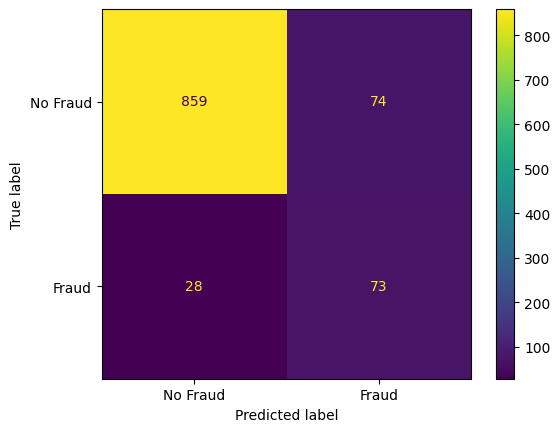

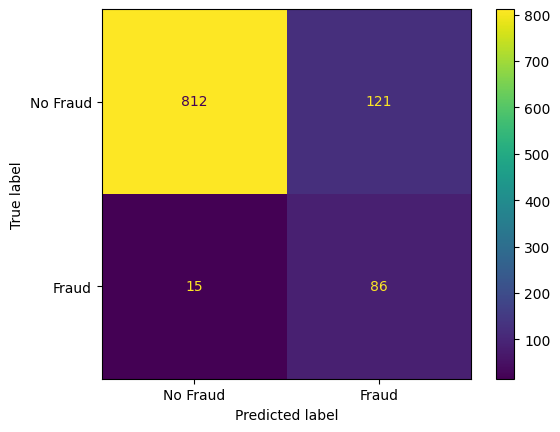

In [51]:
# Getting confusion matrices and analysis based on tuned parameters

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100
    )

lr_model = LogisticRegression(
    class_weight=class_weight_dict,
    random_state=42,
    solver='liblinear',
    penalty='l2',
    C=0.01
    )


xgb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)


xgb_preds = xgb_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Confusion matrices
xgb_cm = confusion_matrix(y_test, xgb_preds)
lr_cm = confusion_matrix(y_test, lr_preds)

print("=== XGBoost Confusion Matrix ===")
print(xgb_cm)
ConfusionMatrixDisplay(xgb_cm, display_labels=['No Fraud', 'Fraud']).plot()

print("\n=== Logistic Regression Confusion Matrix ===")
print(lr_cm)
ConfusionMatrixDisplay(lr_cm, display_labels=['No Fraud', 'Fraud']).plot()

# Cost-based analysis
# Example: assume cost per False Negative = $1000, cost per False Positive = $10
fn_cost = 1000
fp_cost = 10

xgb_fn = xgb_cm[1,0]
xgb_fp = xgb_cm[0,1]
xgb_total_cost = xgb_fn*fn_cost + xgb_fp*fp_cost

lr_fn = lr_cm[1,0]
lr_fp = lr_cm[0,1]
lr_total_cost = lr_fn*fn_cost + lr_fp*fp_cost

print("\n=== XGBoost Cost Analysis ===")
print(f"False Negatives: {xgb_fn}, False Positives: {xgb_fp}, Total Cost: ${xgb_total_cost}")

print("\n=== Logistic Regression Cost Analysis ===")
print(f"False Negatives: {lr_fn}, False Positives: {lr_fp}, Total Cost: ${lr_total_cost}")


### Confusion Matrix and Cost Analysis

Assuming cost per False Negative = 1000 , cost per False Positive = 10 :

- **XGBoost:** 859 TN, 74 FP, 28 FN, 73 TP → Total Cost = $28,740  

- **Logistic Regression:** 812 TN, 121 FP, 15 FN, 86 TP → Total Cost = $16,210  

While XGBoost has higher recall than before, it results in more false positives, leading to a higher total cost compared to Logistic Regression.


In [52]:
# Create DataFrame with predictions and true labels
test_results = X_test.copy()
test_results['y_true'] = y_test
test_results['xgb_pred'] = xgb_preds
test_results['lr_pred'] = lr_preds


# False Positives (legitimate flagged as fraud)
xgb_fp_cases = test_results[(test_results['y_true'] == 0) & (test_results['xgb_pred'] == 1)]
lr_fp_cases = test_results[(test_results['y_true'] == 0) & (test_results['lr_pred'] == 1)]

print("=== XGBoost False Positives (sample 3) ===")
display(xgb_fp_cases.head(3))

print("\n=== Logistic Regression False Positives (sample 3) ===")
display(lr_fp_cases.head(3))

# False Negatives (fraud missed)
xgb_fn_cases = test_results[(test_results['y_true'] == 1) & (test_results['xgb_pred'] == 0)]
lr_fn_cases = test_results[(test_results['y_true'] == 1) & (test_results['lr_pred'] == 0)]

print("\n=== XGBoost False Negatives (sample 3) ===")
display(xgb_fn_cases.head(3))

print("\n=== Logistic Regression False Negatives (sample 3) ===")
display(lr_fn_cases.head(3))


# Correctly classified samples (not FP or FN) for both models
xgb_correct = test_results[((test_results['y_true'] == 0) & (test_results['xgb_pred'] == 0)) |
                           ((test_results['y_true'] == 1) & (test_results['xgb_pred'] == 1))]
lr_correct = test_results[((test_results['y_true'] == 0) & (test_results['lr_pred'] == 0)) |
                          ((test_results['y_true'] == 1) & (test_results['lr_pred'] == 1))]

print("\n=== XGBoost Correctly Classified Samples (sample 3) ===")
display(xgb_correct.head(3))

print("\n=== Logistic Regression Correctly Classified Samples (sample 3) ===")
display(lr_correct.head(3))
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)



=== XGBoost False Positives (sample 3) ===


,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,IPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_mean,ChronicCond_Alzheimer_ratio,ChronicCond_Heartfailure_ratio,ChronicCond_KidneyDisease_ratio,ChronicCond_Cancer_ratio,ChronicCond_ObstrPulmonary_ratio,ChronicCond_Depression_ratio,ChronicCond_Diabetes_ratio,ChronicCond_IschemicHeart_ratio,ChronicCond_Osteoporasis_ratio,ChronicCond_rheumatoidarthritis_ratio,ChronicCond_stroke_ratio,RenalDiseaseIndicator_ratio,y_true,xgb_pred,lr_pred
300,77,77,29,108490,1408.961039,4316.729569,9712.0,126.129870,12.0,12.0,5968.311688,2507.792208,0.441558,0.623377,0.467532,0.220779,0.337662,0.467532,0.818182,0.805195,0.441558,0.428571,0.142857,0.207792,0,1,0
1014,37,30,2,460400,12443.243243,12118.959905,37380.0,1068.000000,12.0,12.0,28313.243243,1813.783784,0.567568,0.648649,0.729730,0.324324,0.432432,0.621622,0.864865,0.918919,0.378378,0.459459,0.054054,0.135135,0,1,1
836,79,75,39,408830,5175.063291,7935.561776,45924.0,581.316456,12.0,12.0,11421.898734,2089.240506,0.430380,0.683544,0.468354,0.227848,0.443038,0.379747,0.772152,0.759494,0.341772,0.341772,0.202532,0.265823,0,1,1



=== Logistic Regression False Positives (sample 3) ===


,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,IPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_mean,ChronicCond_Alzheimer_ratio,ChronicCond_Heartfailure_ratio,ChronicCond_KidneyDisease_ratio,ChronicCond_Cancer_ratio,ChronicCond_ObstrPulmonary_ratio,ChronicCond_Depression_ratio,ChronicCond_Diabetes_ratio,ChronicCond_IschemicHeart_ratio,ChronicCond_Osteoporasis_ratio,ChronicCond_rheumatoidarthritis_ratio,ChronicCond_stroke_ratio,RenalDiseaseIndicator_ratio,y_true,xgb_pred,lr_pred
4860,16,16,13,63450,3965.625000,11416.044247,4272.0,267.000000,12.0,12.0,7155.625000,1603.750000,0.437500,0.375000,0.500000,0.250000,0.375000,0.437500,0.812500,0.687500,0.375000,0.625000,0.062500,0.250000,0,0,1
1014,37,30,2,460400,12443.243243,12118.959905,37380.0,1068.000000,12.0,12.0,28313.243243,1813.783784,0.567568,0.648649,0.729730,0.324324,0.432432,0.621622,0.864865,0.918919,0.378378,0.459459,0.054054,0.135135,0,1,1
836,79,75,39,408830,5175.063291,7935.561776,45924.0,581.316456,12.0,12.0,11421.898734,2089.240506,0.430380,0.683544,0.468354,0.227848,0.443038,0.379747,0.772152,0.759494,0.341772,0.341772,0.202532,0.265823,0,1,1



=== XGBoost False Negatives (sample 3) ===


,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,IPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_mean,ChronicCond_Alzheimer_ratio,ChronicCond_Heartfailure_ratio,ChronicCond_KidneyDisease_ratio,ChronicCond_Cancer_ratio,ChronicCond_ObstrPulmonary_ratio,ChronicCond_Depression_ratio,ChronicCond_Diabetes_ratio,ChronicCond_IschemicHeart_ratio,ChronicCond_Osteoporasis_ratio,ChronicCond_rheumatoidarthritis_ratio,ChronicCond_stroke_ratio,RenalDiseaseIndicator_ratio,y_true,xgb_pred,lr_pred
3566,23,19,3,255090,11090.869565,14234.781639,21360.0,970.909091,12.000000,12.000000,17680.000000,1393.913043,0.478261,0.565217,0.695652,0.086957,0.391304,0.565217,0.869565,0.826087,0.043478,0.521739,0.173913,0.478261,1,0,1
2486,256,96,23,120400,470.312500,1470.138549,9044.0,35.466667,12.000000,11.933594,4902.304688,1553.984375,0.304688,0.582031,0.347656,0.152344,0.289062,0.371094,0.687500,0.789062,0.261719,0.292969,0.128906,0.148438,1,0,1
1937,171,71,10,115090,673.040936,2518.916222,8046.0,47.052632,11.157895,11.906433,5251.228070,2659.473684,0.280702,0.555556,0.409357,0.140351,0.356725,0.444444,0.678363,0.719298,0.298246,0.269006,0.152047,0.204678,1,0,0



=== Logistic Regression False Negatives (sample 3) ===


,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,IPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_mean,ChronicCond_Alzheimer_ratio,ChronicCond_Heartfailure_ratio,ChronicCond_KidneyDisease_ratio,ChronicCond_Cancer_ratio,ChronicCond_ObstrPulmonary_ratio,ChronicCond_Depression_ratio,ChronicCond_Diabetes_ratio,ChronicCond_IschemicHeart_ratio,ChronicCond_Osteoporasis_ratio,ChronicCond_rheumatoidarthritis_ratio,ChronicCond_stroke_ratio,RenalDiseaseIndicator_ratio,y_true,xgb_pred,lr_pred
1937,171,71,10,115090,673.040936,2518.916222,8046.0,47.052632,11.157895,11.906433,5251.228070,2659.473684,0.280702,0.555556,0.409357,0.140351,0.356725,0.444444,0.678363,0.719298,0.298246,0.269006,0.152047,0.204678,1,0,0
2290,20,17,8,141000,7050.000000,5335.827268,21360.0,1068.000000,12.000000,12.000000,19812.500000,1803.000000,0.700000,0.750000,0.850000,0.150000,0.450000,0.550000,0.800000,0.950000,0.150000,0.350000,0.050000,0.550000,1,1,0
3930,63,62,40,170660,2708.888889,4211.946570,22518.0,357.428571,11.619048,12.000000,10566.507937,2274.603175,0.380952,0.682540,0.587302,0.095238,0.222222,0.396825,0.746032,0.841270,0.269841,0.333333,0.095238,0.333333,1,0,0



=== XGBoost Correctly Classified Samples (sample 3) ===


,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,IPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_mean,ChronicCond_Alzheimer_ratio,ChronicCond_Heartfailure_ratio,ChronicCond_KidneyDisease_ratio,ChronicCond_Cancer_ratio,ChronicCond_ObstrPulmonary_ratio,ChronicCond_Depression_ratio,ChronicCond_Diabetes_ratio,ChronicCond_IschemicHeart_ratio,ChronicCond_Osteoporasis_ratio,ChronicCond_rheumatoidarthritis_ratio,ChronicCond_stroke_ratio,RenalDiseaseIndicator_ratio,y_true,xgb_pred,lr_pred
4860,16,16,13,63450,3965.625000,11416.044247,4272.0,267.000000,12.000000,12.000000,7155.625000,1603.750000,0.437500,0.375000,0.500000,0.250000,0.375000,0.437500,0.812500,0.687500,0.375000,0.625000,0.062500,0.250000,0,0,1
2990,116,112,65,34700,299.137931,573.595175,150.0,1.293103,12.000000,11.948276,6121.120690,2443.620690,0.439655,0.543103,0.379310,0.172414,0.293103,0.482759,0.681034,0.844828,0.258621,0.370690,0.155172,0.146552,0,0,0
3622,134,65,2,30380,226.716418,453.663079,110.0,0.820896,11.820896,11.902985,3243.059701,1881.268657,0.425373,0.522388,0.425373,0.119403,0.305970,0.455224,0.686567,0.791045,0.261194,0.380597,0.134328,0.082090,0,0,0



=== Logistic Regression Correctly Classified Samples (sample 3) ===


,TotalClaims,UniqueBeneficiaries,UniquePhysicians,InscClaimAmtReimbursed_sum,InscClaimAmtReimbursed_mean,InscClaimAmtReimbursed_std,DeductibleAmtPaid_sum,DeductibleAmtPaid_mean,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,IPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_mean,ChronicCond_Alzheimer_ratio,ChronicCond_Heartfailure_ratio,ChronicCond_KidneyDisease_ratio,ChronicCond_Cancer_ratio,ChronicCond_ObstrPulmonary_ratio,ChronicCond_Depression_ratio,ChronicCond_Diabetes_ratio,ChronicCond_IschemicHeart_ratio,ChronicCond_Osteoporasis_ratio,ChronicCond_rheumatoidarthritis_ratio,ChronicCond_stroke_ratio,RenalDiseaseIndicator_ratio,y_true,xgb_pred,lr_pred
300,77,77,29,108490,1408.961039,4316.729569,9712.0,126.129870,12.000000,12.000000,5968.311688,2507.792208,0.441558,0.623377,0.467532,0.220779,0.337662,0.467532,0.818182,0.805195,0.441558,0.428571,0.142857,0.207792,0,1,0
2990,116,112,65,34700,299.137931,573.595175,150.0,1.293103,12.000000,11.948276,6121.120690,2443.620690,0.439655,0.543103,0.379310,0.172414,0.293103,0.482759,0.681034,0.844828,0.258621,0.370690,0.155172,0.146552,0,0,0
3622,134,65,2,30380,226.716418,453.663079,110.0,0.820896,11.820896,11.902985,3243.059701,1881.268657,0.425373,0.522388,0.425373,0.119403,0.305970,0.455224,0.686567,0.791045,0.261194,0.380597,0.134328,0.082090,0,0,0


### Error Analysis — Why the models made faulty decisions & how to fix it

**Why these errors happened (patterns observed)**  
- **False Negatives (fraud missed):** many FN samples showed *high total reimbursements* (\$255090), *large numbers of unique beneficiaries*, and *high deductible sums* (\$32150), yet their per-claim statistics and chronic-condition ratios were often **mid-range** (not extreme). In other words, these fraudulent providers look like high-volume, legitimate providers — large totals but without clear, extreme outlier signatures — so the model treats them as normal. FN cases also exhibited **high variance** in claim amounts (large `std`) and elevated inpatient reimbursements, which the model didn’t separate reliably from benign high-volume behavior.  
- **False Positives (legitimate flagged as fraud):** conversely, some legitimate large providers or hospitals have extreme totals(\$460k) and big deductible sums (\$45,924) the exact signals the model learned as “fraud-like.” Without contextual features (e.g., provider type or expected scale), the model over-penalizes large but legitimate actors.

**Which features most likely contributed**
- `InscClaimAmtReimbursed_sum`, `InscClaimAmtReimbursed_mean`, `InscClaimAmtReimbursed_std` (high sums / high variance)  
- `DeductibleAmtPaid_sum` and `DeductibleAmtPaid_mean` (very large deductibles)  
- `UniqueBeneficiaries`, `UniquePhysicians` (large networks)  
- Chronic-condition ratio features — when they are *moderate* they fail to separate fraud from legit

---

### Practical Refinements for Future Iterations:

1. **Normalize by provider scale**  
   Add per-beneficiary and per-physician ratios (e.g., `reimbursed_sum / unique_beneficiaries`).  
   This prevents large legitimate providers from being flagged simply for high totals.

2. **Add temporal and trend features**  
   Compute spikes, rolling averages, or month-over-month deltas.  
   Fraud often appears as sudden changes rather than continuously high values.

3. **Add contextual/provider metadata (if available)**  
   Include features like provider type, region, facility size.  
   This helps distinguish *high-volume hospitals* from *high-volume fraud*.

### Preventing Overfitting

To prevent overfitting in our fraud detection models, we applied the following strategies:

1. **Data Partitioning:**  
   - The dataset was split into a **training set (80%)** and a **hold-out test set (20%)** using **stratification** to preserve the class imbalance.

2. **Regularization:**  
   - **Logistic Regression**: Used **L2 regularization** and tuned the `C` parameter to control model complexity.  
   - **XGBoost**: Tuned key hyperparameters (`max_depth`, `learning_rate`, `n_estimators`) to avoid overfitting.  

3. **Validation Strategies:**  
   - Performed **Stratified K-Fold Cross-Validation** (5 folds) for hyperparameter tuning, ensuring that each fold preserves the class distribution.  
